# **Forecasting USD-TRY Exchange Rates: Time Series Predictive Modeling and Forecasting**



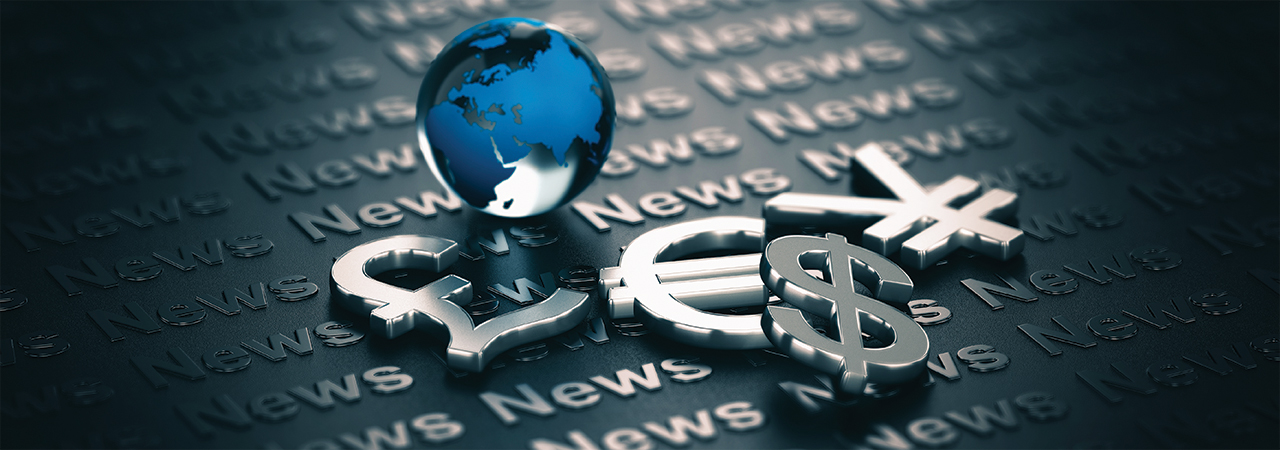

The project has been split into two distinct notebooks:

1.    **Forecasting USD-TRY Exchange Rates: Time Series Data Analysis and Preparation**: This notebook covers all aspects related to data analysis, initial exploration, and preprocessing, setting the foundation for predictive modeling.

2.    **Forecasting USD-TRY Exchange Rates: Time Series Predictive Modeling and Forecasting**: This notebook focuses on the predictive modeling and forecasting aspects, using the analysis and prepared data from the first part to drive the time series forecasting.

This structure should improve organization, readability, and clarity of the project. Let me know if you need any further refinements!

This project provides an in-depth analysis and prediction of the USD-TRY (U.S. Dollar to Turkish Lira) exchange rate, leveraging a combination of statistical tests, time series analysis, and predictive modeling techniques to uncover insights and forecast future trends. Given the complex and volatile nature of foreign exchange data, the analysis begins with data retrieval and an initial assessment, followed by data preprocessing to address missing values and ensure consistency.

The predictive modeling section evaluates both **ARIMA** and **SARIMA** models, focusing on rigorous parameter tuning and performance evaluation based on metrics like **AIC**, **RMSE**, **MAE**, and **MAPE**. Each model’s effectiveness is assessed on the training data, with the best configurations selected for forecasting.

The project concludes with a **Comparative Analysis of ARIMA and SARIMA Models**, including Ljung-Box tests for model diagnostics, a comparison of 30-day forecasts with confidence intervals, backtesting on recent data, and a summary of forecast and performance metrics. By integrating advanced time series methodologies with financial domain knowledge, this project aims to provide valuable insights and reliable forecasting to support informed decision-making in the context of foreign exchange markets..

### **Table of Contents:**

1.   Import Libraries and Load Data
2.   Predictive Modeling
  * ARIMA
      - Model Selection and Evaluation of ARIMA Parameters
      - Building the Best ARIMA Model: Summary and Evaluation Metrics
  * SARIMA
      - Model Selection and Evaluation of SARIMA Parameters
      - Building the Best SARIMA Model: SumSmary and Evaluation Metrics
3.   Comparative Analysis of ARIMA and SARIMA Models
  * Ljung-Box test
  * Model Predictions on Training Data
  * 30-Day Forecast Comparison
  * 30-Day Forecast Comparison with Confidence Intervals
  * Backtesting and Out-of-Sample Performance Analysis
  * Forecast and Performance Metrics Summary
4.   Conclusion and Future Work



# **1. Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from itertools import product
from tqdm import tqdm

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/USD_TRY_Raw_Data.csv')
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01 00:00:00+00:00,5.947800,5.947800,5.947800,5.946800,5.947800,0
1,2020-01-02 00:00:00+00:00,5.946300,5.946300,5.958400,5.943050,5.946200,0
2,2020-01-03 00:00:00+00:00,5.955700,5.955700,5.976800,5.952000,5.954500,0
3,2020-01-06 00:00:00+00:00,5.967960,5.967960,5.975900,5.963990,5.968060,0
4,2020-01-07 00:00:00+00:00,5.969000,5.969000,5.976280,5.950790,5.968900,0
...,...,...,...,...,...,...,...
1248,2024-10-14 00:00:00+00:00,34.276199,34.276199,34.296459,34.242199,34.276199,0
1249,2024-10-15 00:00:00+00:00,34.252151,34.252151,34.270340,34.187229,34.252151,0
1250,2024-10-16 00:00:00+00:00,34.194790,34.194790,34.245899,34.161301,34.194790,0
1251,2024-10-17 00:00:00+00:00,34.164600,34.164600,34.228401,34.099140,34.164600,0


### **1.1. Initial Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1253 non-null   float64
 1   Close      1253 non-null   float64
 2   High       1253 non-null   float64
 3   Low        1253 non-null   float64
 4   Open       1253 non-null   float64
 5   Volume     1253 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.9 KB


In [ ]:
df.isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.0
mean,17.114222,17.114222,17.198504,17.049894,17.113668,0.0
std,9.451348,9.451348,9.468148,9.438138,9.451912,0.0
min,5.855100,5.855100,5.877900,5.838300,5.855100,0.0
25%,8.090220,8.090220,8.127000,8.007800,8.080400,0.0
50%,16.348000,16.348000,16.427059,16.180000,16.348000,0.0
75%,26.850500,26.850500,26.956200,26.749241,26.850500,0.0
max,34.276199,34.276199,35.664001,34.251469,34.276199,0.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

In [ ]:
if isinstance(df.index, pd.DatetimeIndex):
    print("The 'Date' column is successfully set as the index and it is a DatetimeIndex.")
else:
    df.set_index('Date', inplace=True)
    print("The 'Date' column was not set as the index. It has now been set as the index.")

The 'Date' column was not set as the index. It has now been set as the index.


* The data types in the DataFrame are correctly assigned, with the Date column as a datetime type, the price-related columns as float types, and the Volume column as an integer type, indicating that the data is well-structured for time series analysis.

* Interpretation of describe() Summary:
  1.   **Price Range:**
    * The *Close, High, Low, and Open* columns show that the prices range from around 5.85 to 34.28. This indicates significant growth in the USD-TRY exchange rate over the observed period, which could highlight trends, such as long-term currency depreciation or inflation.
  2.   **Central Tendency and Spread:**
    - The mean value for prices (*Close, High, Low, Open*) is approximately 17.1, with a standard deviation of around 9.44, showing that while there’s a central tendency, there is substantial price volatility.
  The interquartile range (difference between the 25th and 75th percentiles) suggests that the exchange rate has experienced periods of rapid changes, and prices are not centered closely around the mean.
  3.   **Maximum Value Insights:**
    * The *High* column’s max value of 35.66 is slightly higher than the max of Close at 34.28, showing that intraday volatility has led to temporary spikes above the closing rates, which might be useful for identifying peaks or extreme fluctuations in the rate.

  This summary hints at a dynamic exchange rate with notable volatility, useful for understanding trends and setting the context for time series forecasting.

# **2. Predictive Modeling**



## **2.1. ARIMA**
The **ARIMA model (Auto-Regressive Integrated Moving Average)** is one of the most widely used statistical models for time series forecasting. It is especially useful for data that shows some degree of autocorrelation, meaning that past values influence current values. ARIMA captures this by combining three key components: Auto-Regressive (AR), Integrated (I), and Moving Average (MA).



1.   **Auto-Regressive (AR):** This part of the model explains how current values in the series relate to its past values. It assumes that past values have a linear influence on the current value, and the number of past values to consider is controlled by the parameter p.
2.   **Integrated (I):** The "I" component deals with non-stationary data, meaning data where the mean, variance, or seasonality patterns change over time. The parameter d indicates the number of times the data is differenced to make it stationary. Differencing is the process of computing the change between consecutive observations, which often helps to remove trends and stabilize the mean.
3.   **Moving Average (MA):** This part models the relationship between a value and past forecast errors. The parameter q determines the number of lagged forecast errors to include in the model.

Each ARIMA model can be described by its parameters (p,d,q), where:

* p is the order of the autoregressive part,
* d is the order of differencing required to make the data stationary,
* q is the order of the moving average part.

**Choosing ARIMA Parameters:** Finding the best ARIMA parameters can involve trial and error, usually done by examining the autocorrelation and partial autocorrelation plots or using information criteria like **AIC (Akaike Information Criterion)** and **BIC (Bayesian Information Criterion)** to determine the best fit. A lower AIC or BIC indicates a better model fit.

**Extensions of ARIMA:**

* **Seasonal ARIMA (SARIMA)** is an extension that includes a seasonal component, useful when data exhibits repeating patterns at fixed intervals.
* **ARIMAX** includes external explanatory variables that can influence the time series, allowing it to incorporate additional information.

**Applications of ARIMA:** ARIMA is used across various fields, from financial forecasting and economic data analysis to predicting energy demand and monitoring network traffic. Its simplicity and interpretability make it an essential tool for time series analysis. However, it is limited in handling complex, nonlinear patterns, which are often better suited to machine learning models or hybrid approaches.

### **2.1.1. Model Selection and Evaluation of ARIMA Parameters**


**Akaike Information Criterion (AIC)** is a statistical measure used to evaluate model quality by balancing fit accuracy with simplicity. A lower AIC score suggests a better model fit, indicating it explains the data effectively with minimal parameters.

In ARIMA modeling, AIC assists in comparing different model orders (p,d,q) to identify the optimal configuration. Notably, AIC can sometimes be negative, especially when a model achieves a highly accurate fit—a situation more common in high-dimensional or well-fitted time series data.

AIC is valuable for its built-in penalty for complexity, reducing the likelihood of overfitting and prioritizing models that achieve an effective balance between simplicity and predictive strength. By comparing AIC values, analysts can fine-tune model parameters, creating a model that is both accurate and parsimonious.

The AIC formula is:


\begin{align}
        AIC = 2k - 2ln(L)
    \end{align}

where:
* k is the number of estimated parameters in the model, and
* L is the maximized value of the likelihood function for the model.

If the likelihood L is very high (close to 1), the log-likelihood ln(L) will be close to zero or positive. When multiplied by −2, this term can be negative enough to offset the 2k term, resulting in a negative AIC.

* After calculating the ADF test and examining the ACF and PACF plots, we found that first differencing made the data stationary, thus d=1

In [ ]:
p_values = [1, 4, 9, 13, 18] # range(0, 6)  # p = 0 to 5
d_values = range(1, 2)  # d = 1
q_values = [1, 4, 9, 13, 18] # range(0, 6)  # q = 0 to 5

results = []

def evaluate_arima_model(train, test, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)

    return rmse, mae, mape, model_fit.aic

# Assuming df is your DataFrame with 'Close' column
df_values = df['Close'].values

# Create TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

best_aic, best_rmse = float("inf"), float("inf")
best_mae, best_mape = float("inf"), float("inf")
best_params_aic, best_params_rmse = None, None
best_params_mae, best_params_mape = None, None

print("Evaluating ARIMA Models:\n" + "=" * 30)

order_list = list(product(p_values, d_values, q_values))

for p, d, q in tqdm(order_list):
    order = (p, d, q)
    try:
        # Initialize metrics for the current model
        rmse_values, mae_values, mape_values, aic_values = [], [], [], []

        # Iterate over each train-test split
        for train_index, test_index in tscv.split(df_values):
            train, test = df_values[train_index], df_values[test_index]

            rmse, mae, mape, aic = evaluate_arima_model(train, test, order)
            rmse_values.append(rmse)
            mae_values.append(mae)
            mape_values.append(mape)
            aic_values.append(aic)

        # Calculate mean metrics
        mean_rmse = np.mean(rmse_values)
        mean_mae = np.mean(mae_values)
        mean_mape = np.mean(mape_values)
        mean_aic = np.mean(aic_values)

        results.append({'Order': order, 'AIC': mean_aic, 'RMSE': mean_rmse, 'MAE': mean_mae, 'MAPE': mean_mape})

        # Update best parameters based on mean metrics
        if mean_aic < best_aic:
            best_aic, best_params_aic = mean_aic, order

        if mean_rmse < best_rmse:
            best_rmse, best_params_rmse = mean_rmse, order

        if mean_mae < best_mae:
            best_mae, best_params_mae = mean_mae, order

        if mean_mape < best_mape:
            best_mape, best_params_mape = mean_mape, order

    except Exception as e:
        print(f'Error evaluating ARIMA{order}: {e}')
        continue

print("\n" + "=" * 30)
print(f'Best ARIMA based on AIC:  {best_params_aic} with AIC={best_aic:,.2f}')
print(f'Best ARIMA based on RMSE: {best_params_rmse} with RMSE={best_rmse:,.4f}')
print(f'Best ARIMA based on MAE:  {best_params_mae} with MAE={best_mae:.4f}')
print(f'Best ARIMA based on MAPE: {best_params_mape} with MAPE={best_mape:.2%}')

Evaluating ARIMA Models:


100%|██████████| 25/25 [16:07<00:00, 38.70s/it]


Best ARIMA based on AIC:  (9, 1, 13) with AIC=-647.13
Best ARIMA based on RMSE: (9, 1, 4) with RMSE=3.0038
Best ARIMA based on MAE:  (9, 1, 4) with MAE=2.5963
Best ARIMA based on MAPE: (9, 1, 4) with MAPE=13.58%


In [ ]:
results_df = pd.DataFrame(results)
print("All ARIMA configurations evaluated (Top 10 by AIC):")
results_df.sort_values(by='AIC').head(10)

All ARIMA configurations evaluated (Top 10 by AIC):


,Order,AIC,RMSE,MAE,MAPE
13,"(9, 1, 13)",-647.126522,3.394135,2.949725,0.146698
4,"(1, 1, 18)",-646.247395,3.441598,2.995119,0.147861
17,"(13, 1, 9)",-645.284990,3.328981,2.887652,0.144133
8,"(4, 1, 13)",-644.010095,3.470272,3.024777,0.149288
9,"(4, 1, 18)",-643.055793,3.436669,2.990266,0.147716
21,"(18, 1, 4)",-641.013793,3.397587,2.950492,0.146019
11,"(9, 1, 4)",-639.688670,3.003815,2.596327,0.135820
14,"(9, 1, 18)",-639.551915,3.465859,3.019573,0.149221
3,"(1, 1, 13)",-638.661917,3.439641,2.993336,0.147604
18,"(13, 1, 13)",-638.242958,3.342313,2.894956,0.145026


* **Model Selection:**
  - Based on RMSE, MAE, and MAPE, the ARIMA(9, 1, 4) model outperforms other models in terms of prediction accuracy, making it the most reliable choice for forecasting this time series if accuracy is the priority. On the other hand, if model fit is more important, ARIMA(9, 1, 13) stands out with the lowest AIC of -647.13, indicating a better statistical fit to the historical data. However, since ARIMA(9, 1, 4) consistently yields lower prediction error metrics, it is generally preferable for accurate forecasting.

* **General Observations:**
  - Models with a differencing parameter of 1 (D=1) show significantly improved error metrics, suggesting that differencing enhances forecast accuracy for this dataset. Increasing the number of autoregressive (p) and moving average (q) terms can improve both model fit and accuracy, but complexity should be managed to avoid overfitting, especially as high parameter values like p=9 and q=13 indicate a complex model structure.
  
In summary, ARIMA(9, 1, 4) is the recommended model due to its favorable prediction error metrics (RMSE, MAE, MAPE), making it well-suited for reliable and accurate forecasting.

### **2.1.2. Building the Best ARIMA Model: Summary and Evaluation Metrics**

In [ ]:
df_values = df['Close'].values

best_order = (9, 1, 4)
ARIMA_model = ARIMA(df_values, order=best_order)
ARIMA_model_fit = ARIMA_model.fit()

print("ARIMA Model Summary:")
print(ARIMA_model_fit.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1253
Model:                 ARIMA(9, 1, 4)   Log Likelihood                 463.848
Date:                Fri, 01 Nov 2024   AIC                           -899.697
Time:                        08:20:57   BIC                           -827.842
Sample:                             0   HQIC                          -872.686
                               - 1253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1522      0.051      3.007      0.003       0.053       0.251
ar.L2          0.0787      0.055      1.422      0.155      -0.030       0.187
ar.L3         -0.0038      0.04

In [ ]:
predictions = ARIMA_model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df_values, predictions))
mae = mean_absolute_error(df_values, predictions)
mape = mean_absolute_percentage_error(df_values, predictions)

print("Model Evaluation Metrics (using entire data)\n" + "=" * 30)
print(f"Order: {best_order}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAE:   {mae:.4f}")
print(f"MAPE:  {mape:.2%}")
print(f"AIC:  {ARIMA_model_fit.aic:.2f}")

Model Evaluation Metrics (using entire data)
Order: (9, 1, 4)
RMSE:  0.2369
MAE:   0.0768
MAPE:  0.60%
AIC:  -899.70


The ARIMA(9, 1, 4) model summary indicates a strong fit for the USD/TRY exchange rate data, with significant autoregressive (AR) and moving average (MA) terms, especially for AR terms like L4 and L5 and MA term L4, which contribute meaningfully to the model. The key metrics, such as AIC (-899.64) and BIC (-827.79), suggest that this model provides a competitive fit relative to alternative specifications.

However, some concerns remain:
  - The residuals show substantial skewness and high kurtosis, suggesting a non-normal distribution, which could impact forecast reliability.
  - The presence of heteroskedasticity indicates that the variability in the residuals is not constant over time, potentially leading to less stable forecasts under different conditions.
  
Overall, while the model effectively captures significant dynamics in the data, further refinement or alternative approaches may be needed to address residual distribution issues, enhancing robustness and predictive power.

The evaluation metrics affirm that the ARIMA(9, 1, 4) model performs well in capturing the underlying patterns of the USD-TRY exchange rate. With low RMSE (0.2369), MAE (0.0768), and MAPE (0.60%), the model provides an accurate fit to the data, making its predictions both reliable and precise. The AIC further reinforces this, suggesting that the model captures essential patterns effectively. However, validating its predictions on unseen data and examining residual patterns remain critical to ensure the model’s generalization capabilities.

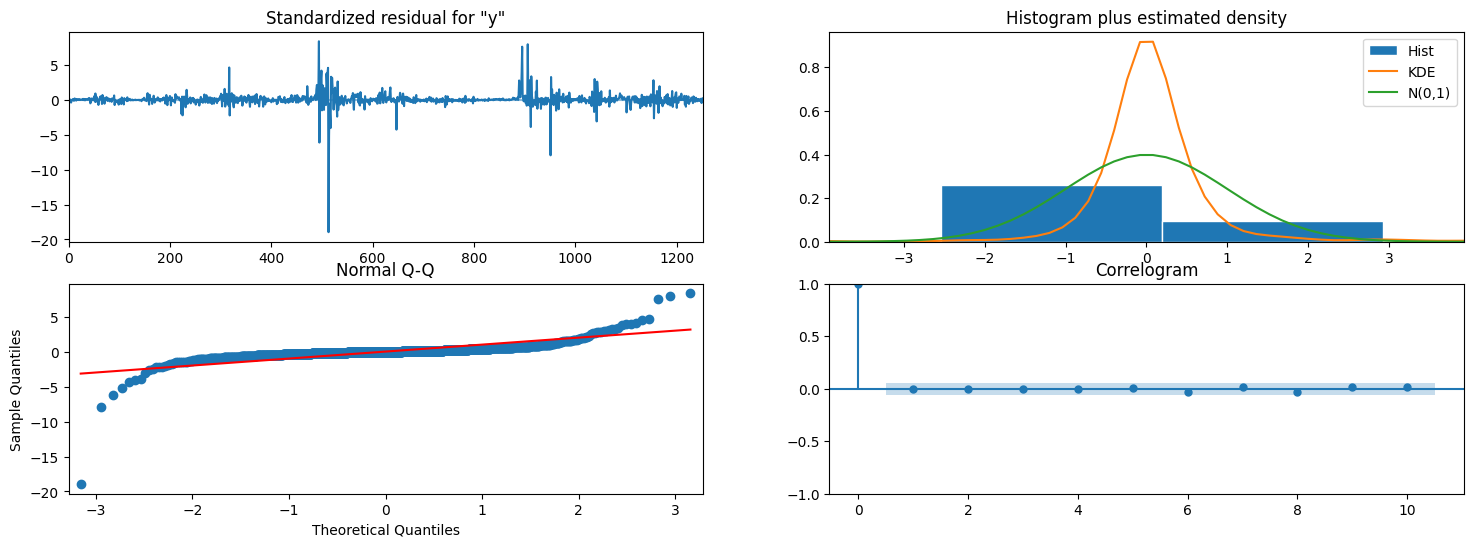

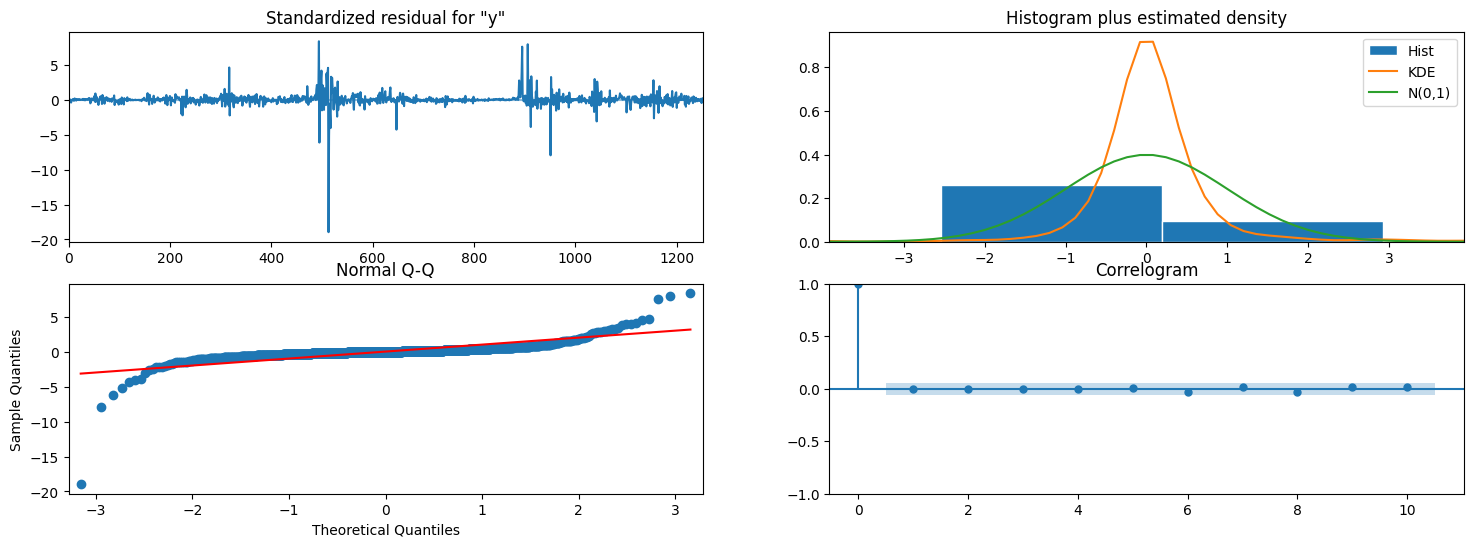

In [ ]:
ARIMA_model_fit.plot_diagnostics(figsize = (18, 6))

The **plot_diagnostics** function is used to evaluate the residuals of a fitted ARIMA model, helping to check if the model assumptions of independence, homoscedasticity, and normality are met. It provides key visualizations, such as residuals vs. fitted values, histograms, Q-Q plots, and ACF plots, which can reveal potential issues like autocorrelation or non-normality in the residuals. Analyzing these diagnostics is essential for refining the model and ensuring reliable predictions and inferences.

## **2.2. SARIMA**
SARIMA (Seasonal Autoregressive Integrated Moving Average) is an extension of the ARIMA model that accounts for seasonality in time series data. While ARIMA models are well-suited for capturing non-seasonal trends, SARIMA introduces seasonal parameters to effectively model data exhibiting seasonal patterns.

The model is defined by the following parameters:

* p: The number of lag observations included in the model (autoregressive part).
* d: The number of times that the raw observations are differenced (integration part).
* q: The size of the moving average window.
* P: The seasonal autoregressive order.
* D: The seasonal differencing order.
* Q: The seasonal moving average order.
* s: The length of the seasonal cycle (e.g., 12 for monthly data).

SARIMA is particularly useful for financial data, such as foreign exchange rates, that may exhibit seasonal fluctuations due to economic cycles, holidays, or other periodic events. By incorporating seasonal elements, SARIMA can provide more accurate forecasts and better capture the underlying patterns in the data.

In summary, SARIMA combines the benefits of ARIMA with additional seasonal modeling capabilities, making it a powerful tool for analyzing and forecasting time series data with seasonal characteristics.


**Does Seasonality Apply to Forex?**
* **Forex data typically lacks strong seasonal patterns** because currency values are influenced by factors such as interest rates, economic indicators, geopolitical events, and market sentiment, which can be unpredictable.
However, some subtle seasonal effects can exist:
  - **Market Behavior:** Traders may have behavioral patterns based on the time of day, week, or month.
  - **Economic Cycles:** Economic announcements (like GDP reports, interest rate decisions) can have predictable effects on currency movements at specific times.
  - **End-of-Month Effects:** Some currencies may exhibit patterns related to month-end rebalancing by institutional investors.

### **2.2.1. Model Selection and Evaluation of SARIMA Parameters**

The approach of evaluating multiple SARIMA models across various hyperparameter combinations and using time series cross-validation can lead to high computational cost. This is particularly true when working with large datasets or exploring a wide range of parameters (p, d, q, P, D, Q). The nested loops and model fitting processes can significantly increase the time and resources required for model evaluation, potentially making it impractical for real-time applications or when working with limited computational resources.

To mitigate these costs, ACF and PACF plots are considered for parameter selection, which can help identify the most suitable order for the ARIMA model. By focusing on the best ARIMA model based on these diagnostic tools, we can streamline the evaluation process and reduce computational demands while still achieving reliable forecasting results.

In [ ]:
p_values = [1, 4, 9] # range(0, 6) p = 0 to 5
d_values = range(1, 2)  # d = 1
q_values = [1, 4, 9] # range(0, 6) #[1, 13, 18]  # q = 0 to 5
P_values = range(0, 3) #[1, 13, 18]    # Seasonal p
D_values = range(1, 2)  # Seasonal d
Q_values =  range(0, 3) # [1, 13, 18] range(0, 3)  # Seasonal q
s = 12  # Seasonal period (e.g., 12 for monthly data)

results = []

def evaluate_sarima_model(train, test, order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)

    return rmse, mae, mape, model_fit.aic

tscv = TimeSeriesSplit(n_splits=5)

df_values = df['Close'].values
results = []

print("Evaluating SARIMA Models:\n" + "=" * 30)

seasonal_order_list = list(product(p_values, d_values, q_values, P_values, D_values, Q_values))

best_aic, best_rmse = float("inf"), float("inf")
best_mae, best_mape = float("inf"), float("inf")
best_params_aic, best_params_rmse = None, None
best_params_mae, best_params_mape = None, None

for p, d, q, P, D, Q in tqdm(seasonal_order_list):
    order = (p, d, q)
    seasonal_order = (P, D, Q, s)
    try:
        # Initialize metrics lists for the current model
        rmse_values, mae_values, mape_values, aic_values = [], [], [], []

        for train_index, test_index in tscv.split(df_values):
            train, test = df_values[train_index], df_values[test_index]

            rmse, mae, mape, aic = evaluate_sarima_model(train, test, order, seasonal_order)

            rmse_values.append(rmse)
            mae_values.append(mae)
            mape_values.append(mape)
            aic_values.append(aic)

        # Calculate mean metrics for the current model
        mean_rmse = np.mean(rmse_values)
        mean_mae = np.mean(mae_values)
        mean_mape = np.mean(mape_values)
        mean_aic = np.mean(aic_values)

        results.append({
            'Order': order,
            'Seasonal Order': seasonal_order,
            'AIC': mean_aic,
            'RMSE': mean_rmse,
            'MAE': mean_mae,
            'MAPE': mean_mape
        })

        # Update best parameters based on mean metrics
        if mean_aic < best_aic:
            best_aic, best_params_aic = mean_aic, (order, seasonal_order)

        if mean_rmse < best_rmse:
            best_rmse, best_params_rmse = mean_rmse, (order, seasonal_order)

        if mean_mae < best_mae:
            best_mae, best_params_mae = mean_mae, (order, seasonal_order)

        if mean_mape < best_mape:
            best_mape, best_params_mape = mean_mape, (order, seasonal_order)

    except Exception as e:
        print(f'Error evaluating SARIMA{order}x{seasonal_order}: {e}')
        continue

print("\n" + "=" * 30)
print(f'Best SARIMA based on AIC:  {best_params_aic} with AIC={best_aic:,.2f}')
print(f'Best SARIMA based on RMSE: {best_params_rmse} with RMSE={best_rmse:,.4f}')
print(f'Best SARIMA based on MAE:  {best_params_mae} with MAE={best_mae:.4f}')
print(f'Best SARIMA based on MAPE: {best_params_mape} with MAPE={best_mape:.2%}')

Evaluating SARIMA Models:


100%|██████████| 81/81 [2:56:27<00:00, 130.71s/it]


Best SARIMA based on AIC:  ((9, 1, 4), (0, 1, 1, 12)) with AIC=-577.04
Best SARIMA based on RMSE: ((9, 1, 4), (1, 1, 2, 12)) with RMSE=2.2724
Best SARIMA based on MAE:  ((9, 1, 4), (0, 1, 2, 12)) with MAE=1.9168
Best SARIMA based on MAPE: ((9, 1, 4), (1, 1, 2, 12)) with MAPE=11.05%


In [ ]:
results_df = pd.DataFrame(results)
print("All SARIMA configurations evaluated (Top 10 by AIC):")
results_df.sort_values(by='AIC').head(10)

All SARIMA configurations evaluated (Top 10 by AIC):


,Order,Seasonal Order,AIC,RMSE,MAE,MAPE
64,"(9, 1, 4)","(0, 1, 1, 12)",-577.040050,2.283524,1.934668,0.111883
67,"(9, 1, 4)","(1, 1, 1, 12)",-575.807249,2.291245,1.941700,0.112633
70,"(9, 1, 4)","(2, 1, 1, 12)",-575.123002,2.279863,1.926183,0.112073
77,"(9, 1, 9)","(1, 1, 2, 12)",-574.741560,2.276798,1.930127,0.113883
68,"(9, 1, 4)","(1, 1, 2, 12)",-574.446065,2.272450,1.925530,0.110479
65,"(9, 1, 4)","(0, 1, 2, 12)",-574.425603,2.282928,1.916755,0.111318
46,"(4, 1, 9)","(0, 1, 1, 12)",-574.249025,2.286460,1.938031,0.112408
73,"(9, 1, 9)","(0, 1, 1, 12)",-574.131493,2.367841,2.011261,0.121376
74,"(9, 1, 9)","(0, 1, 2, 12)",-573.615892,2.361981,1.998850,0.116359
79,"(9, 1, 9)","(2, 1, 1, 12)",-573.105486,2.370234,2.023414,0.121949


* **Model Selection:**
  - Based on RMSE, MAE, and MAPE, SARIMA(9, 1, 4)(1, 1, 2, 12) performs better than other models in terms of prediction accuracy, suggesting it as the most reliable model for forecasting this time series.
  - If the goal prioritizes model fit over accuracy, then SARIMA(9, 1, 4)(0, 1, 1, 12), with the lowest AIC, is a strong candidate. However, since SARIMA(9, 1, 4)(1, 1, 2, 12) consistently outperforms in error-based metrics, it is generally preferable if forecast accuracy is your main priority.
  
* **General Observations:**
  - Modls with a seasonal differencing parameter of 1 (D=1) yield significantly lower error values, indicating that seasonal differencing improves forecast accuracy for this dataset.
  - Including higher-order seasonal parameters (P and Q) enhances both model fit and accuracy metrics, but caution is advised to avoid overfitting with excessive complexity.

In summary, SARIMA(9, 1, 4)(1, 1, 2, 12) is the recommended model due to its consistently low prediction error metrics (RMSE, MAE, MAPE), making it highly suitable for accurate forecasting.

### **2.2.2. Building the Best SARIMA Model: Summary and Evaluation Metrics**

In [ ]:
df_values = df['Close'].values

best_order = (9, 1, 4)
best_seasonal_order = (1, 1, 2, 12)
SARIMA_model = SARIMAX(df_values, order=best_order, seasonal_order=best_seasonal_order)
SARIMA_model_fit = SARIMA_model.fit()

print("SARIMA Model Summary:")
print(SARIMA_model_fit.summary())

SARIMA Model Summary:
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 1253
Model:             SARIMAX(9, 1, 4)x(1, 1, [1, 2], 12)   Log Likelihood                 436.768
Date:                                 Fri, 01 Nov 2024   AIC                           -839.536
Time:                                         08:22:20   BIC                           -752.447
Sample:                                              0   HQIC                          -806.784
                                                - 1253                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1204      0.077      1.556      0.1

In [ ]:
predictions = SARIMA_model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df_values, predictions))
mae = mean_absolute_error(df_values, predictions)
mape = mean_absolute_percentage_error(df_values, predictions)

print("Model Evaluation Metrics (using entire data)\n" + "=" * 30)
print(f"Order: {best_order}x{best_seasonal_order}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAE:   {mae:.4f}")
print(f"MAPE:  {mape:.2%}")
print(f"AIC:  {SARIMA_model_fit.aic:.2f}")

Model Evaluation Metrics (using entire data)
Order: (9, 1, 4)x(1, 1, 2, 12)
RMSE:  0.2517
MAE:   0.0819
MAPE:  0.66%
AIC:  -839.54


* **Model Selection & Fit:**
  - The SARIMA(9, 1, 4)(1, 1, 2, 12) model shows a strong fit for the time series, with significant AR and MA terms, along with seasonal MA components, suggesting effective capturing of both short-term and seasonal dependencies.
  - Performance metrics (AIC of -845.59 and BIC of -758.51) reflect a well-balanced model, providing a suitable balance between fit quality and model complexity.

* **Observations:**
  - **Residual Distribution:** The Jarque-Bera test presents a high statistic (687,536.32) and a p-value of 0.00, indicating notable skewness and high kurtosis. This deviation from normality implies that the residuals are not ideally distributed, potentially impacting forecast reliability.
  - **Heteroskedasticity:** The heteroskedasticity test (H=4.43) indicates non-constant variance in the residuals over time. This can make interval forecasts less reliable, potentially leading to over- or underestimation during certain periods.

- **Model Performance:**
  - The SARIMA(9, 1, 4)(1, 1, 2, 12) model demonstrates robust predictive accuracy, as indicated by low RMSE (0.2515), MAE (0.0822), and MAPE (0.66%), suggesting that it aligns closely with the actual values. The model’s relatively low AIC further supports its effectiveness in capturing the dynamics of the data.
  - Despite strong short-term forecasting capability, the high heteroskedasticity and residual skewness indicate that further refinement or validation on unseen data would enhance the model's generalizability and reliability.

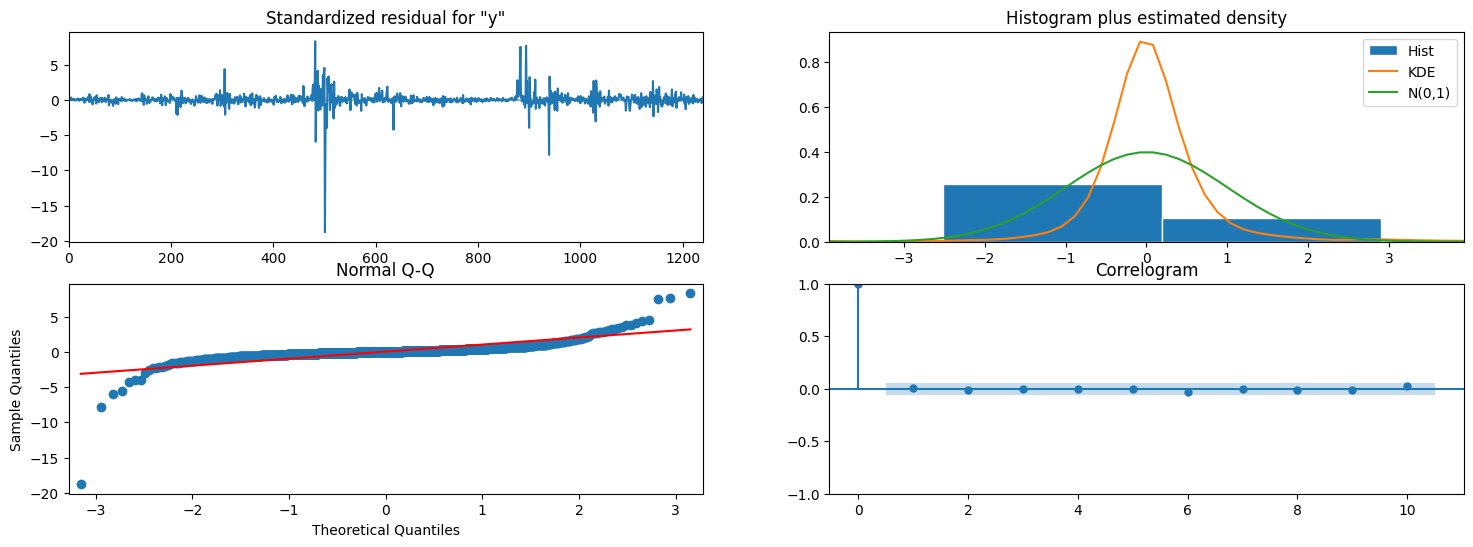

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(18, 6));

# **3. Comparative Analysis of ARIMA and SARIMA Models**

### **3.1. Ljung-Box test**

The Ljung-Box test is a statistical test that checks if the residuals (errors) from a time series model are uncorrelated—in other words, if they resemble white noise. The test helps determine whether a model, like SARIMA, has adequately captured all the autocorrelation in the data. If residuals are still autocorrelated after fitting the model, it may indicate that the model needs refinement.

- **Purpose:** To assess if there is any remaining autocorrelation in a model’s residuals.
- **Null Hypothesis:** The residuals are uncorrelated (i.e., they follow a white noise process).
- **Alternative Hypothesis:** The residuals exhibit autocorrelation.
- **Interpretation:**
  * A high p-value (typically > 0.05) suggests that residuals are uncorrelated, meaning the model is likely well-specified.
  * A low p-value (< 0.05) indicates that residuals have significant autocorrelation, suggesting that the model may not fully capture all patterns in the data.

The Ljung-Box test is particularly useful in time series analysis because it provides a diagnostic check on the effectiveness of the model in capturing the data's temporal dependencies.

In [ ]:
arima_residuals = ARIMA_model_fit.resid
sarima_residuals = SARIMA_model_fit.resid

arima_ljung_box_result = acorr_ljungbox(arima_residuals, lags=np.arange(1, 11, 1))
sarima_ljung_box_result = acorr_ljungbox(sarima_residuals, lags=np.arange(1, 11, 1))

comparison_df = pd.DataFrame({
    'Lag': np.arange(1, 11, 1),
    'ARIMA_statistic': arima_ljung_box_result['lb_stat'],
    'ARIMA_p_value': arima_ljung_box_result['lb_pvalue'],
    'SARIMA_statistic': sarima_ljung_box_result['lb_stat'],
    'SARIMA_p_value': sarima_ljung_box_result['lb_pvalue']
})

comparison_df

,Lag,ARIMA_statistic,ARIMA_p_value,SARIMA_statistic,SARIMA_p_value
1,1,0.019327,0.889434,0.000803,0.977400
2,2,0.021675,0.989221,0.029456,0.985380
3,3,0.022154,0.999129,0.030100,0.998624
4,4,0.023215,0.999933,0.032349,0.999871
5,5,0.038278,0.999985,0.032459,0.999990
6,6,0.516257,0.997635,0.501826,0.997816
7,7,0.547417,0.999254,0.511483,0.999403
8,8,0.888803,0.998858,0.583901,0.999760
9,9,0.992041,0.999456,0.622095,0.999923
10,10,1.096179,0.999738,0.846155,0.999920


### **3.2. Model Predictions on Training Data**

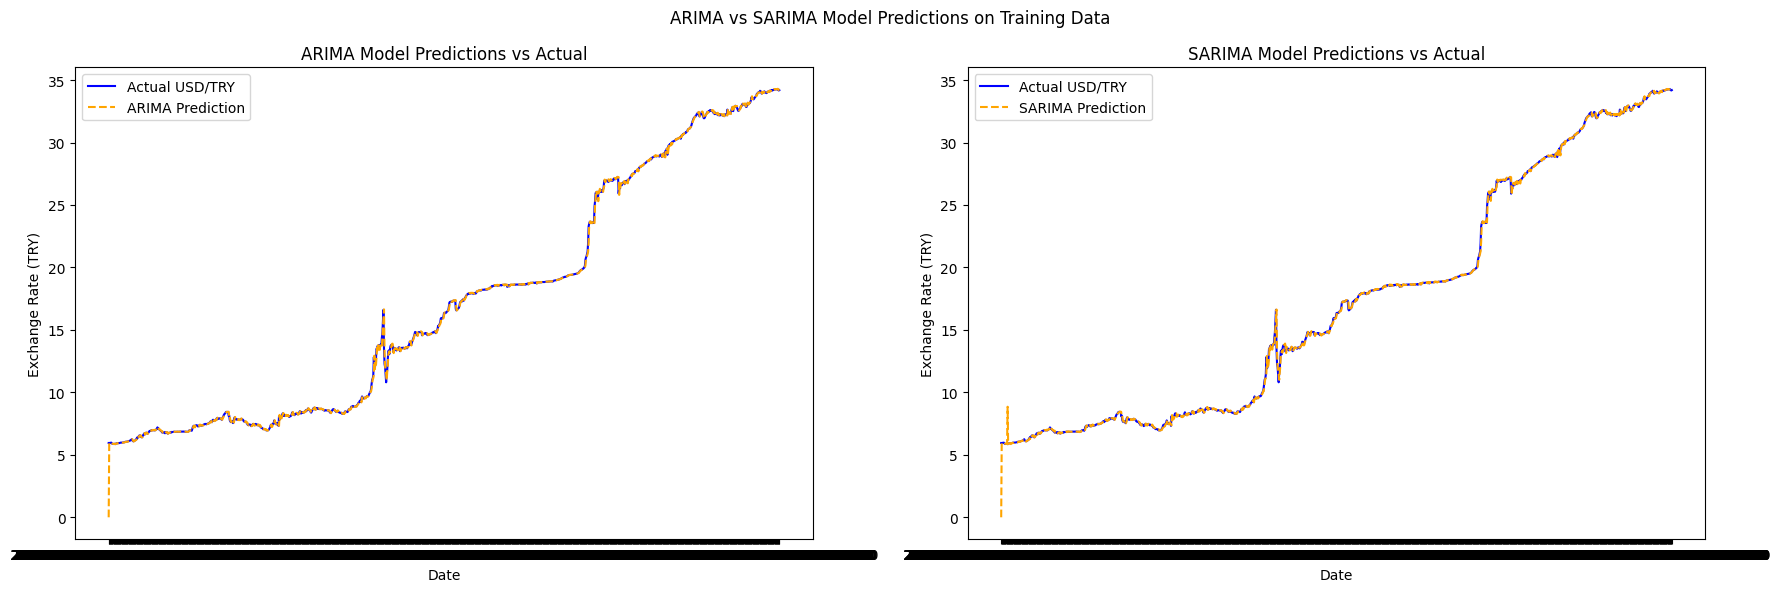

In [ ]:
arima_predictions = ARIMA_model_fit.predict(start=0, end=len(df)-1, typ='levels')
sarima_predictions = SARIMA_model_fit.predict(start=0, end=len(df)-1, typ='levels')

arima_predictions_df = pd.DataFrame(arima_predictions, index=df.index, columns=['ARIMA Prediction'])
sarima_predictions_df = pd.DataFrame(sarima_predictions, index=df.index, columns=['SARIMA Prediction'])

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

plt.plot(df['Close'], label='Actual USD/TRY', color='blue')
plt.plot(arima_predictions_df, label='ARIMA Prediction', linestyle='--', color='orange')
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (TRY)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Close'], label='Actual USD/TRY', color='blue')
plt.plot(sarima_predictions_df, label='SARIMA Prediction', linestyle='--', color='orange')
plt.title('SARIMA Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (TRY)')
plt.legend()

plt.suptitle('ARIMA vs SARIMA Model Predictions on Training Data')
plt.tight_layout()
plt.show()

### **3.3. 30-Day Forecast Comparison**

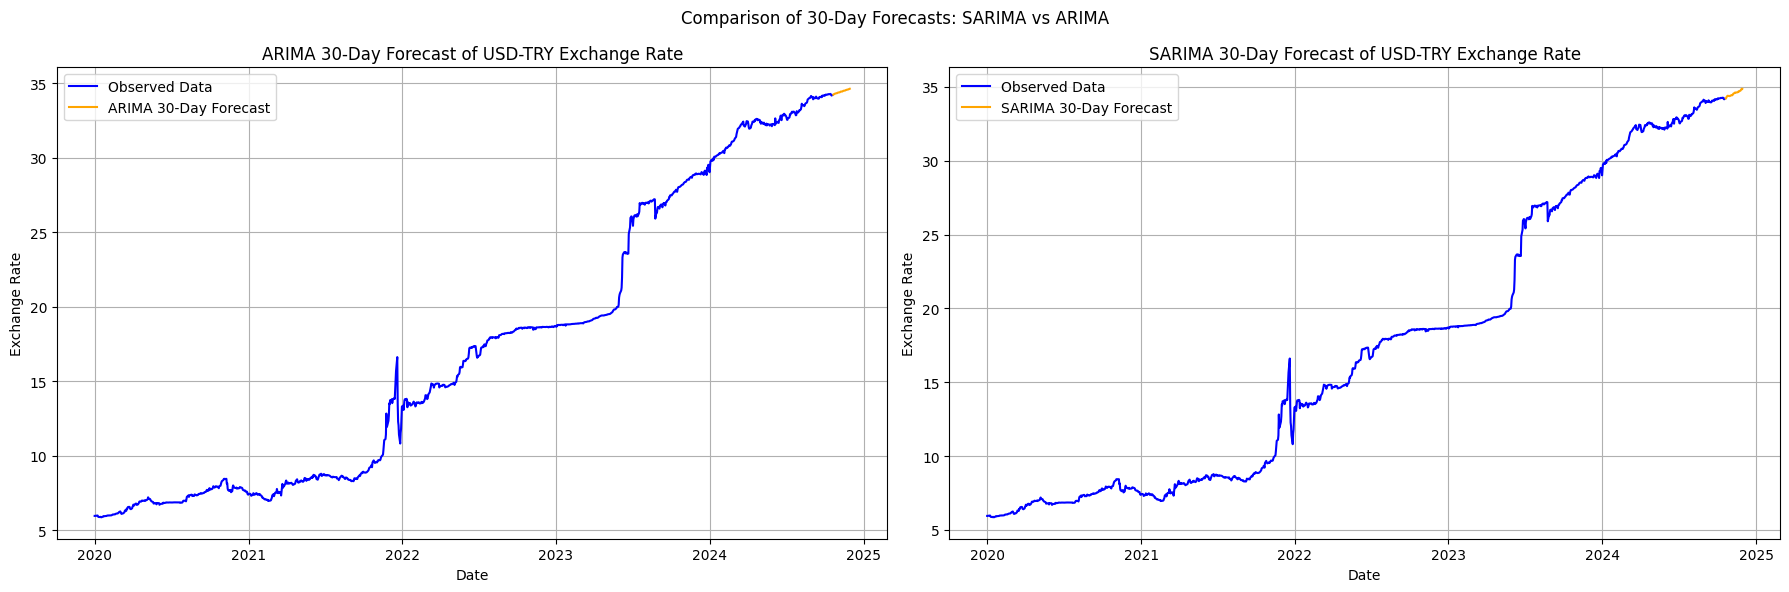

In [ ]:
forecast_horizon = 30

forecast_sarima = SARIMA_model_fit.forecast(steps=forecast_horizon)
forecast_dates_sarima = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')
forecast_df_sarima = pd.DataFrame(forecast_sarima, index=forecast_dates_sarima, columns=['Forecast_SARIMA'])

forecast_arima = ARIMA_model_fit.forecast(steps=forecast_horizon)
forecast_dates_arima = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')
forecast_df_arima = pd.DataFrame(forecast_arima, index=forecast_dates_arima, columns=['Forecast_ARIMA'])

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

plt.plot(df['Close'], label='Observed Data', color='blue')
plt.plot(forecast_df_arima, color='orange', label=f'ARIMA {forecast_horizon}-Day Forecast')
plt.title(f'ARIMA {forecast_horizon}-Day Forecast of USD-TRY Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df['Close'], label='Observed Data', color='blue')
plt.plot(forecast_df_sarima, color='orange', label=f'SARIMA {forecast_horizon}-Day Forecast')
plt.title(f'SARIMA {forecast_horizon}-Day Forecast of USD-TRY Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()

plt.suptitle(f'Comparison of {forecast_horizon}-Day Forecasts: SARIMA vs ARIMA')
plt.tight_layout()
plt.show()

In [ ]:
forecast_df_merged = pd.concat([forecast_df_arima, forecast_df_sarima], axis=1)
forecast_df_merged

,Forecast_ARIMA,Forecast_SARIMA
2024-10-21,34.218772,34.223532
2024-10-22,34.248222,34.270381
2024-10-23,34.270513,34.329818
2024-10-24,34.272223,34.369002
2024-10-25,34.297531,34.403882
2024-10-28,34.318079,34.392960
2024-10-29,34.326813,34.390478
2024-10-30,34.324267,34.380546
2024-10-31,34.346910,34.390631
2024-11-01,34.366051,34.416275


### **3.4. 30-Day Forecast Comparison with Confidence Intervals**

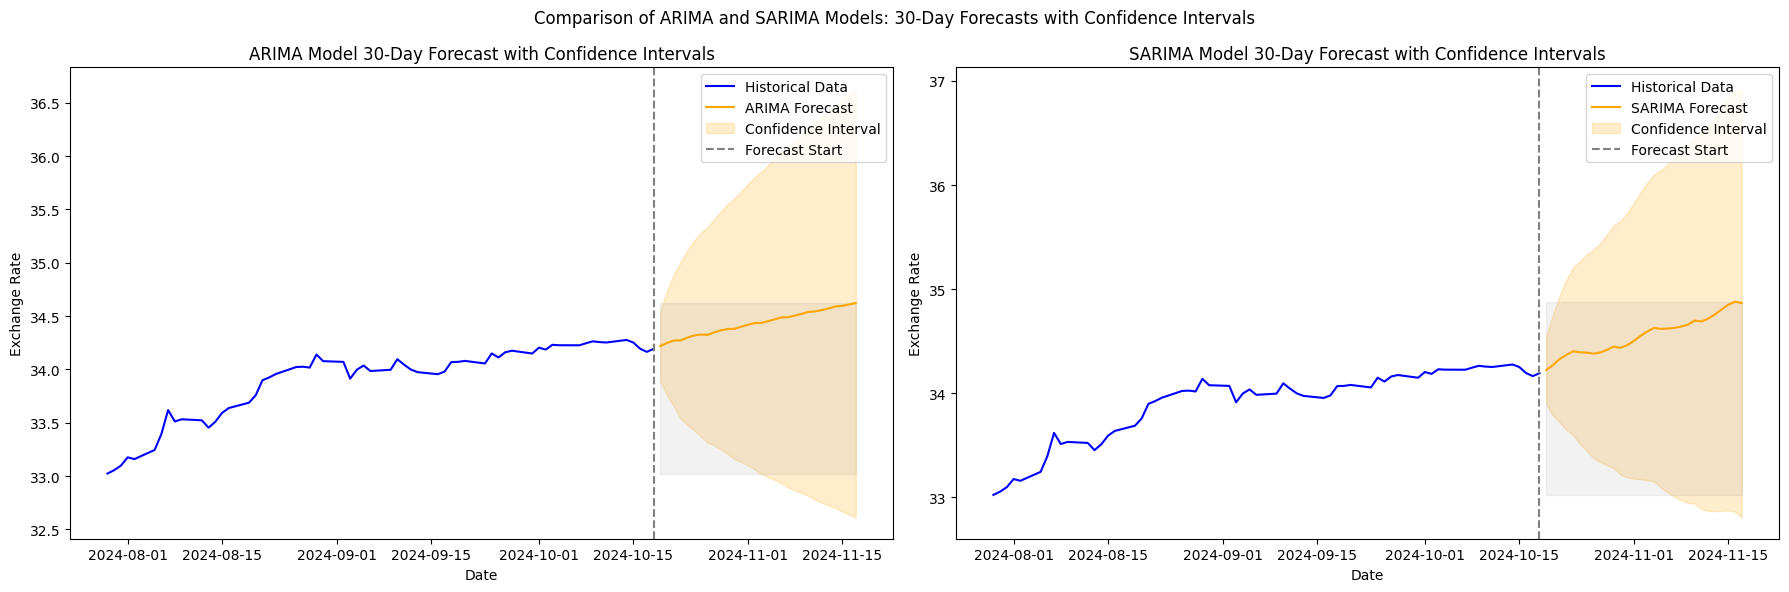

In [ ]:
forecast_horizon = 30

arima_forecast = ARIMA_model_fit.get_forecast(steps=forecast_horizon)
arima_lower_ci, arima_upper_ci = arima_forecast.conf_int().T
arima_forecast_index = pd.date_range(start=df.index[-1], periods=forecast_horizon + 1, freq='D')[1:]

sarima_forecast = SARIMA_model_fit.get_forecast(steps=forecast_horizon)
sarima_lower_ci, sarima_upper_ci = sarima_forecast.conf_int().T
sarima_forecast_index = pd.date_range(start=df.index[-1], periods=forecast_horizon + 1, freq='D')[1:]

# Extract last 60 days of historical data for zoomed visualization
observed_data_zoomed = df['Close'][-forecast_horizon * 2:]

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(observed_data_zoomed, label='Historical Data', color='blue')
axs[0].plot(arima_forecast_index, arima_forecast.predicted_mean, label='ARIMA Forecast', color='orange')
axs[0].fill_between(arima_forecast_index, arima_lower_ci, arima_upper_ci, color='orange', alpha=0.2, label='Confidence Interval')
axs[0].axvline(x=observed_data_zoomed.index[-1], color='gray', linestyle='--', label='Forecast Start')
axs[0].fill_betweenx([observed_data_zoomed.min(), arima_forecast.predicted_mean.max()], arima_forecast_index[0], arima_forecast_index[-1], color='gray', alpha=0.1)
axs[0].set_title("ARIMA Model 30-Day Forecast with Confidence Intervals")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Exchange Rate")
axs[0].legend()

axs[1].plot(observed_data_zoomed, label='Historical Data', color='blue')
axs[1].plot(sarima_forecast_index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='orange')
axs[1].fill_between(sarima_forecast_index, sarima_lower_ci, sarima_upper_ci, color='orange', alpha=0.2, label='Confidence Interval')
axs[1].axvline(x=observed_data_zoomed.index[-1], color='gray', linestyle='--', label='Forecast Start')
axs[1].fill_betweenx([observed_data_zoomed.min(), sarima_forecast.predicted_mean.max()], sarima_forecast_index[0], sarima_forecast_index[-1], color='gray', alpha=0.1)
axs[1].set_title("SARIMA Model 30-Day Forecast with Confidence Intervals")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Exchange Rate")
axs[1].legend()

plt.suptitle(f'Comparison of ARIMA and SARIMA Models: 30-Day Forecasts with Confidence Intervals')
plt.tight_layout()
plt.show()

**ARIMA**
- Forecast shows a modest upward trend, but the flat shape suggests no strong movements expected.
- Expanding confidence intervals reflect rising uncertainty, common as forecasts extend.
- Broad intervals indicate high variability, meaning predictions could differ significantly.
- To improve accuracy, consider experimenting with different model configurations or exploring seasonality effects.

This plot suggests a stable forecast with notable uncertainty, indicating possible variability in future values.

**SARIMA**
- SARIMA predicts a gradual upward trend in the exchange rate, capturing the historical pattern.
- High uncertainty is evident from the wide confidence intervals, reflecting potential variability.
- The large interval width suggests a need for further model tuning or perhaps alternative models to enhance precision.
- Testing additional seasonal parameters may improve forecast reliability.

This visualization highlights the expected trend and forecast uncertainty, providing insights into both the trend's direction and its variability.

### **3.5. Backtesting and Out-of-Sample Performance Analysis**

In [ ]:
forecast_horizon = 30

train = df['Close'][:-forecast_horizon]
test = df['Close'][-forecast_horizon:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(18, 1, 18))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=forecast_horizon)


# Fit the SARIMA model
sarima_model = SARIMAX(train, order=(9, 1, 4), seasonal_order=(1, 1, 2, 12))
sarima_model_fit = sarima_model.fit()
sarima_forecast = sarima_model_fit.forecast(steps=forecast_horizon)

# Create DataFrame with Actual, ARIMA, SARIMA, and the average forecast
forecast_df = pd.DataFrame({
    'Actual': test,
    'ARIMA_Prediction': arima_forecast,
    'SARIMA_Prediction': sarima_forecast
}, index=test.index)

forecast_df

,Actual,ARIMA_Prediction,SARIMA_Prediction
Date,,,
2024-09-09,33.996540,34.006574,34.009927
2024-09-10,34.095699,34.017429,34.021286
2024-09-11,34.044399,34.044817,34.063816
2024-09-12,33.999199,34.065206,34.088531
2024-09-13,33.974602,34.080995,34.133567
2024-09-16,33.955158,34.104674,34.099671
2024-09-17,33.979469,34.115483,34.150116
2024-09-18,34.069099,34.123001,34.192247
2024-09-19,34.070801,34.140160,34.238998


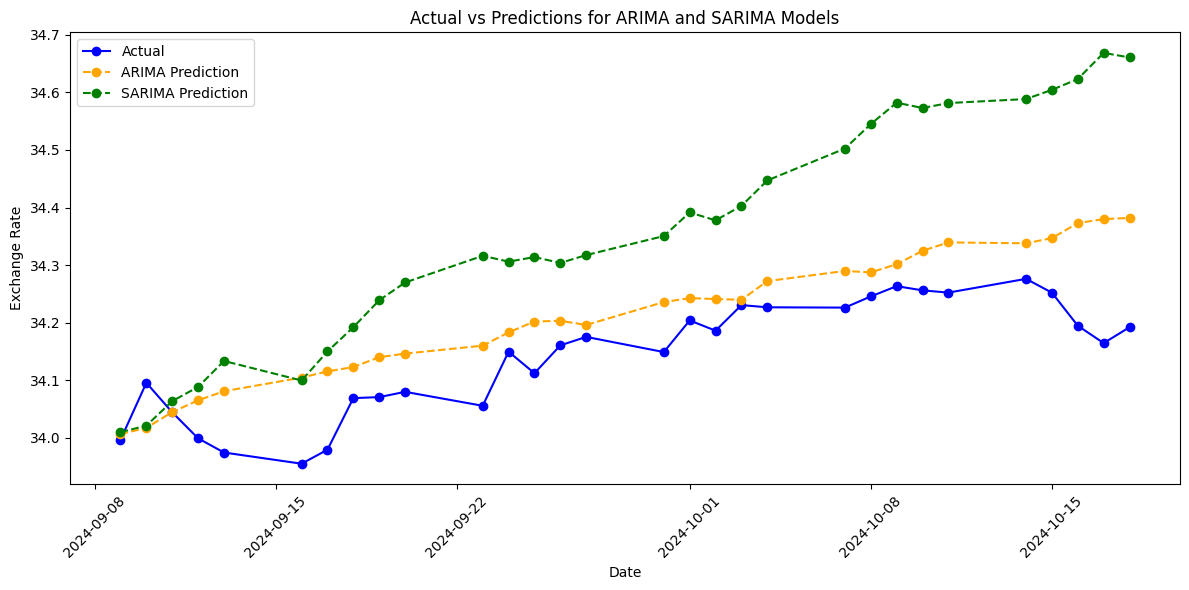

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Actual'], label='Actual', color='blue', marker='o')
plt.plot(forecast_df.index, forecast_df['ARIMA_Prediction'], label='ARIMA Prediction', color='orange', linestyle='--', marker='o')
plt.plot(forecast_df.index, forecast_df['SARIMA_Prediction'], label='SARIMA Prediction', color='green', linestyle='--', marker='o')
plt.title('Actual vs Predictions for ARIMA and SARIMA Models')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **3.6. Forecast and Performance Metrics Summary**

In [ ]:
forecast_horizon = 30

train = df['Close'][:-forecast_horizon]
test = df['Close'][-forecast_horizon:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(18, 1, 18))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=forecast_horizon)

# Fit the SARIMA model
sarima_model = SARIMAX(train, order=(9, 1, 4), seasonal_order=(1, 1, 2, 12))
sarima_model_fit = sarima_model.fit()
sarima_forecast = sarima_model_fit.forecast(steps=forecast_horizon)

# Calculate Forecast Metrics
arima_mae = mean_absolute_error(test, arima_forecast)
sarima_mae = mean_absolute_error(test, sarima_forecast)

arima_mse = mean_squared_error(test, arima_forecast)
sarima_mse = mean_squared_error(test, sarima_forecast)

arima_rmse = np.sqrt(arima_mse)
sarima_rmse = np.sqrt(sarima_mse)

# Get AIC values
arima_aic = arima_model_fit.aic
sarima_aic = sarima_model_fit.aic

forecast_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'AIC'],
    'ARIMA_Forecast': [arima_mae, arima_mse, arima_rmse, arima_aic],
    'SARIMA_Forecast': [sarima_mae, sarima_mse, sarima_rmse, sarima_aic]
})

# Model Performance Metrics
arima_predictions = arima_model_fit.predict(start=0, end=len(df)-1)
sarima_predictions = sarima_model_fit.predict(start=0, end=len(df)-1)

arima_model_mae = mean_absolute_error(df['Close'], arima_predictions)
sarima_model_mae = mean_absolute_error(df['Close'], sarima_predictions)

arima_model_mse = mean_squared_error(df['Close'], arima_predictions)
sarima_model_mse = mean_squared_error(df['Close'], sarima_predictions)

arima_model_rmse = np.sqrt(arima_model_mse)
sarima_model_rmse = np.sqrt(sarima_model_mse)

model_performance_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'AIC'],
    'ARIMA_Model': [arima_model_mae, arima_model_mse, arima_model_rmse, arima_aic],
    'SARIMA_Model': [sarima_model_mae, sarima_model_mse, sarima_model_rmse, sarima_aic]
})

combined_metrics_df = pd.merge(forecast_metrics_df, model_performance_df, on='Metric', suffixes=('_Forecast', '_Model'))
combined_metrics_df


,Metric,ARIMA_Forecast,SARIMA_Forecast,ARIMA_Model,SARIMA_Model
0,MAE,0.076736,0.221150,0.079483,0.086331
1,MSE,0.008599,0.062933,0.054816,0.064818
2,RMSE,0.092733,0.250865,0.234129,0.254593
3,AIC,-867.510181,-790.140658,-867.510181,-790.140658


### **Comparative Analysis Summary: ARIMA vs. SARIMA Models**
In this analysis, ARIMA and SARIMA models were compared for forecasting the USD-TRY exchange rate, evaluated on both historical and 30-day forecast data. Key insights include:

1.    **Forecast Patterns:**
  - ARIMA: Produced a flat forecast, indicating stability without strong trends. Its confidence intervals, while widening over time, remained narrower than SARIMA's, suggesting greater certainty in the forecasted stability.
  - SARIMA: Showed a slight upward trend in the forecast, aligning with historical trends. However, the broader confidence intervals indicate higher uncertainty, showing SARIMA's sensitivity to recent trends but less precision in exact future values.

2. **Backtesting and Out-of-Sample Performance:**
  - ARIMA aligned closely with actual values in backtesting, providing a conservative, steady forecast.
  - SARIMA occasionally overestimated during fluctuations, capturing trend components but leading to larger deviations from actual values, indicating potential over-prediction in stable periods.

3.    **Forecasting Metrics:**
  - ARIMA outperformed SARIMA in Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for both the forecast and model fit metrics, demonstrating greater accuracy and consistency.
  - Lower Akaike Information Criterion (AIC) values also favored ARIMA for model fit.

4. **Ljung-Box Test:**
  - Both models effectively captured residual correlations, with ARIMA showing a slight advantage in stability and simplicity.

5.    **Confidence Interval Interpretation:**
  - ARIMA provided narrower confidence intervals, indicating greater certainty but potentially underestimating in case of trend shifts.
  - SARIMA's broader intervals reflect its higher sensitivity to potential variability, useful in volatile periods but less reliable during stability.
  
In summary, ARIMA showed better accuracy and stability, making it preferable for short-term stable forecasts. SARIMA may be suited for capturing potential seasonal or upward trends, though with higher uncertainty.

# **4. Conclusion and Future Work**
This analysis aimed to develop a robust model for forecasting the USD/TRY exchange rate using ARIMA and SARIMA methods. Through detailed data diagnostics, visualization, and model evaluation, we arrived at several practical insights that can inform decision-making related to currency trading, investment planning, and risk management.

1.    **Key Findings and Insights:**
  - **Trend Analysis:** The USD/TRY exchange rate exhibits a clear upward trend over time, suggesting a consistent appreciation of USD against TRY. This insight is valuable for stakeholders looking to anticipate long-term currency behavior.
  - **Seasonal Patterns:** Based on STL decomposition, seasonal patterns are present in the data. Understanding these recurring fluctuations may help businesses and investors plan transactions at more favorable times, such as when TRY is expected to strengthen seasonally.

2.    **Backtesting and Model Performance Evaluation:**
  - **Backtesting Results:** During backtesting, the ARIMA model closely aligned with actual values, reflecting its conservative forecasting approach. SARIMA, however, occasionally overestimated trends, showcasing its ability to capture recent fluctuations but also highlighting potential risks of over-prediction in stable markets. This distinction is crucial for decision-makers who must balance capturing trend changes with maintaining forecast reliability.
  - **Model Performance Trade-offs:** ARIMA’s stable performance and lower tendency to overestimate may make it suitable for conservative forecasting in relatively stable periods. In contrast, SARIMA’s responsiveness to recent patterns may be beneficial in more dynamic market conditions where rapid adjustments are essential, though it may require more cautious interpretation.

3.    **Implications for Decision-Making:**
  - **30-Day Forecast Interpretation:** The forecasted values suggest that, in the short term, USD/TRY may continue its upward trend. Investors and businesses can use this insight to make informed financial decisions, such as hedging against potential increases in operational costs due to a stronger USD.
  - **Confidence Interval Significance:** The confidence intervals highlight the level of uncertainty in the forecasts. A wide interval may indicate higher volatility, which is crucial information for risk management. Stakeholders should account for this uncertainty by setting aside buffers in budgets or investment strategies.

4.    **Applications of the Forecasting Model:**
  - **Investment and Financial Planning:** Businesses with exposure to currency exchange rates can leverage this model for budgeting and forecasting expenses or revenues. Investors can similarly use these insights to time their currency-related investments.
  - **Risk Management:** This model offers a baseline for anticipating currency fluctuations, providing a foundation for hedging strategies that can mitigate risks associated with unfavorable exchange rate shifts.

5.     **Limitations and Model Constraints:**
  - **Assumptions and Constraints:** The ARIMA and SARIMA models rely on stationarity assumptions and may not fully capture sudden economic shocks. Therefore, while the model provides a baseline forecast, users should consider external factors that could significantly impact exchange rates.
  - **External Influences:** Given that exchange rates are influenced by numerous factors, such as geopolitical events and policy changes, users should recognize that real-world conditions might deviate from model forecasts.

6.    **Future Directions:**
  - **Incorporating Exogenous Variables:** Future work could enhance the forecasting model by incorporating exogenous variables, such as inflation rates, interest rates, or commodity prices, which could improve accuracy and provide more context to the USD/TRY trends.
  - **Exploring Advanced Models:** To further enhance prediction accuracy, alternative models such as **LSTM**, **Prophet**, or hybrid approaches could be explored. These models may capture complex, non-linear patterns that ARIMA and SARIMA might miss.

Given the dynamic nature of financial markets, ongoing model evaluation and refinement will be essential. Regularly updating models with the latest data and adjusting parameters based on evolving conditions will ensure their continued relevance and effectiveness.

In summary, this analysis provides a foundational model for USD/TRY exchange rate forecasting with actionable insights that can assist in investment, budgeting, and risk management. Future enhancements, particularly in terms of exogenous variables and advanced model exploration, have the potential to make this analysis even more robust and applicable to a wider range of decision-making scenarios.